In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import base
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

C:\Users\Msi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
iris = base.load_iris()

In [3]:
df = pd.DataFrame(iris.data)
df.columns = ['sepal_length', 'sepal_width', 
              'petal_length', 'petal_width']
df['species'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# iris 데이터에는 3가지 종이 존재하는데 0, 1, 2로 되어있는 species 컬럼을 이용하여
# setosa, versicolor, virginica로 바꾼 target_names 컬럼을 생성한다.
df['target_names'] = df['species']
for i in range(3):
    df.target_names[df.species == i] = iris.target_names[i]
df.head()

C:\Users\Msi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,sepal_length,sepal_width,petal_length,petal_width,species,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# 결측치 확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
target_names    0
dtype: int64

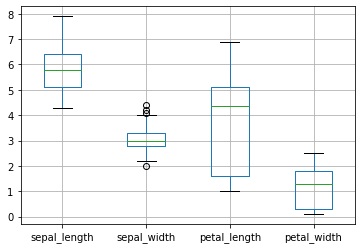

In [6]:
# 이상치 확인
# 극단적인 이상치는 없으므로 연습을 위해 제거하지 않도록 한다.
df.iloc[:,:4].boxplot()

In [7]:
# 데이터의 범위가 약 0~8까지 존재하는 것으로 보이기 때문에 scaling은 하지 않는다.

In [8]:
# 기초통계량 살펴보기
df.iloc[:,:4].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


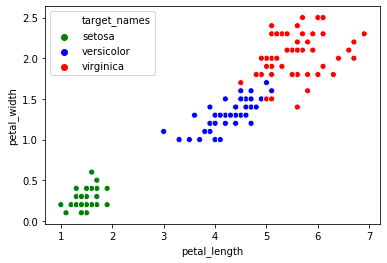

In [9]:
# 꽃잎의 길이와 너비의 관계를 그래프로 확인하기
# 일부 데이터를 제외하고 종을 잘 구분한다.
sns.scatterplot(df['petal_length'], df['petal_width'], 
                hue=df['target_names'], palette=['green','blue','red'])
plt.show()

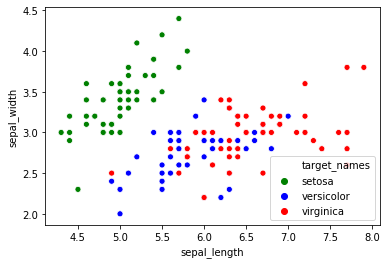

In [10]:
# 꽃받침의 길이와 너비의 관계를 그래프로 확인하기
# setosa는 잘 구분되지만 versicolor와 virginica의 데이터는 잘 구분하지 못하는 모습이다.
sns.scatterplot(df['sepal_length'], df['sepal_width'], 
                hue=df['target_names'], palette=['green','blue','red'])
plt.show()

In [11]:
# 위와 같은 이유로 correlation을 확인해본 결과 petal_width, petal_length의 데이터
# 분포가 비슷하기 때문에 상관관계가 높은 것으로 확인되었다.
corr = df.iloc[:,:4].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


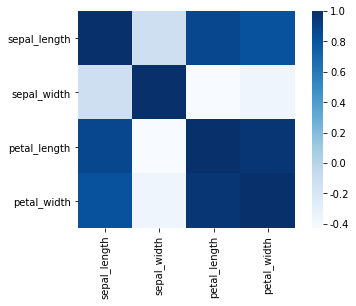

In [12]:
sns.heatmap(corr, square=True, cmap='Blues')
plt.show()

In [13]:
# 다중공선성이 의심될 때 다음과 같은 방법으로 해결할 수 있다.
# 1. OLS를 통한 변수제거법
# 2. MDS, PCA 등 차원 축소를 통한 방법
# 3. 분산팽창지수를 활용한 변수제거법
# 4. 다중공선성에 강한 모델 사용(Lasso회귀 등)
# 여기서는 PCA를 이용한 차원축소 방법을 사용하도록 하겠다.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.iloc[:,:3])
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['component 1', 'component 2']
df_pca["target_names"] = df["target_names"]
df_pca.head()

,component 1,component 2,target_names
0,-2.490880,0.320973,setosa
1,-2.523343,-0.178401,setosa
2,-2.711149,-0.137820,setosa
3,-2.557756,-0.315675,setosa
4,-2.538964,0.331357,setosa


In [14]:
# percentage를 확인해본 결과 첫번째 주성분은 약 92%를 두번째 주성분은 약 6%를 성명한다.
pca_fit = pca.fit(df.iloc[:,:3])
pca_fit.explained_variance_ratio_

array([0.92464061, 0.06046599])

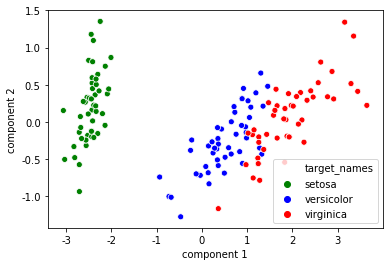

In [15]:
# 주성분 분석 후에 그래프를 그려본 결과 몇개의 데이터를 제외하고 잘 구분되는 것을 확인할 수 있다.
sns.scatterplot(df_pca['component 1'], df_pca['component 2'], 
                hue=df_pca['target_names'], palette=['green','blue','red'])
plt.show()

In [16]:
# x, y를 생성하고 train, test set을 8:2 비율로 나누어준다. 
x = df_pca.drop(["target_names"], axis=1)
y = pd.DataFrame(df["species"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# 첫번째 행은 실제 setosa 데이터 14개 중에 setosa로 예측한 데이터가 14개라는 뜻이다.
# setosa는 잘못 분류된 데이터 없이 모두 잘 분류하였다.
# 두번째 행은 실제로 versicolor인 데이터 8개 중에 versicolor로 예측한 데이터가 6개,
# virginica로 예측한 데이터가 2개라는 뜻이다. 잘못 분류된 데이터가 2개 존재한다.
# 세번째 행은 실제로 virginica인 데이터 8개 중에 versicolor로 예측한 데이터가 1개,
# virginica로 예측한 데이터가 7개라는 뜻이다. 잘못 분류된 데이터가 1개 존재한다.
pred = lr.predict(x_test)
confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

In [19]:
# 정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 
# 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
accuracy_score(y_test, pred)

0.9333333333333333

In [20]:
# precision : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다.
# precision 해석
# setosa 종이라고 예측한 데이터의 100%가 실제 setosa 데이터,
# versicolor 종이라고 예측한 데이터의 80%가 실제 versicolor 데이터,
# virginica 종이라고 예측한 데이터의 71%가 실제 virginica 데이터였다.

# recall : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다.
# recall 해석
# 실제 setosa 종 데이터 중에 실제 setosa 종이라고 예측한 데이터가 91%
# 실제 versicolor 종 데이터 중에 실제 versicolor 종이라고  예측한 데이터가 67%
# 실제 virginica 종 데이터 중에 실제 virginica 종이라고 예측한 데이터가 100%이다.

# f1-score
# 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 
# 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
# Fβ=(1+β2)(precision×recall)/(β2*precision+recall)
# 베타가 1인 경우를 특별히 F1점수라고 한다.
# F1=2⋅precision⋅recall/(precision+recall)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



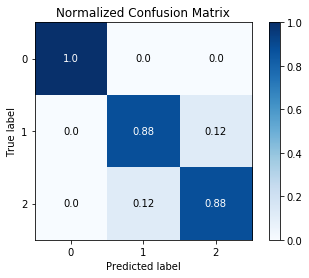

In [21]:
# confusion matrix를 skplt을 사용하면 아래와 같이 히트맵 모형으로 확인 할 수 있다.
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

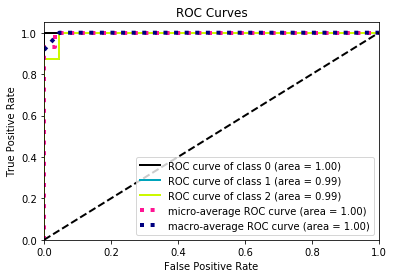

In [22]:
# f1-score도 마찬가지로 skplt을 사용하면 아래와 같이 확인 할 수 있다.
# ROC 그래프는 그래프 아래의 면적이 1에 가까울 수록 분류가 잘 되었다고 평가할 수 있다.
# 평균 ROC curve의 면적은 약 0.99정도로 매우 높게 분류가 되었음을 알 수 있다.
pred_prob = lr.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, pred_prob)